In [131]:
import json
import pandas as pd
import csv
import numpy as np
import mysql.connector
import pymysql
import  matplotlib.pyplot as plt
import  seaborn as sns
import warnings
from collections import Counter
from itertools import chain
fig_size = [80, 80]
plt.rcParams['figure.figsize'] = fig_size
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
import sys
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install pymysql


In [539]:
df_data = pd.read_csv('board_game_data.csv')

In [540]:
df_data.columns = ['board_game_id','name','year','minplayer','maxplayer','playingtime','avgratings','designer','category','mechanic','publisher','age','rank']

In [541]:
df_data.head()

,board_game_id,name,year,minplayer,maxplayer,playingtime,avgratings,designer,category,mechanic,publisher,age,rank
0,2,Dragonmaster,1981,3,4,30,6.61384,"G. W. ""Jerry"" D'Arcey",Card Game:Fantasy,Trick-taking,E.S. Lowe:Milton Bradley,12,3450
1,3,Samurai,1998,2,4,60,7.44238,Reiner Knizia,Abstract Strategy:Medieval,Area Majority / Influence:Hand Management:Set ...,Fantasy Flight Games:Hans im Gluck:999 Games,10,200
2,4,Tal der Konige,1992,2,4,60,6.60429,Christian Beierer,Ancient,Action Points:Area Majority / Influence:Auctio...,KOSMOS,12,4561
3,5,Acquire,1964,2,6,90,7.34534,Sid Sackson,Economic,Hand Management:Investment:Market,"3M:The Avalon Hill Game Co:Avalon Hill Games, ...",12,248
4,6,Mare Mediterraneum,1989,2,6,240,6.51062,Jean du Poel,Civilization:Nautical,Dice Rolling,Historien Spiele Galerie (Historien Spielegale...,12,9295


In [542]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   board_game_id  29673 non-null  int64  
 1   name           29673 non-null  object 
 2   year           29673 non-null  int64  
 3   minplayer      29673 non-null  int64  
 4   maxplayer      29673 non-null  int64  
 5   playingtime    29673 non-null  int64  
 6   avgratings     29673 non-null  float64
 7   designer       29144 non-null  object 
 8   category       29301 non-null  object 
 9   mechanic       26173 non-null  object 
 10  publisher      29670 non-null  object 
 11  age            29673 non-null  int64  
 12  rank           29673 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.9+ MB


In [543]:
board_game_data = df_data.fillna('not define')

In [544]:
board_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   board_game_id  29673 non-null  int64  
 1   name           29673 non-null  object 
 2   year           29673 non-null  int64  
 3   minplayer      29673 non-null  int64  
 4   maxplayer      29673 non-null  int64  
 5   playingtime    29673 non-null  int64  
 6   avgratings     29673 non-null  float64
 7   designer       29673 non-null  object 
 8   category       29673 non-null  object 
 9   mechanic       29673 non-null  object 
 10  publisher      29673 non-null  object 
 11  age            29673 non-null  int64  
 12  rank           29673 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.9+ MB


In [545]:
board_game_data['designer'] = board_game_data['designer'].str.replace(':',', ')
board_game_data['category'] = board_game_data['category'].str.replace(':',', ')
board_game_data['mechanic'] = board_game_data['mechanic'].str.replace(':',', ')
board_game_data['publisher'] = board_game_data['publisher'].str.replace(':',', ')

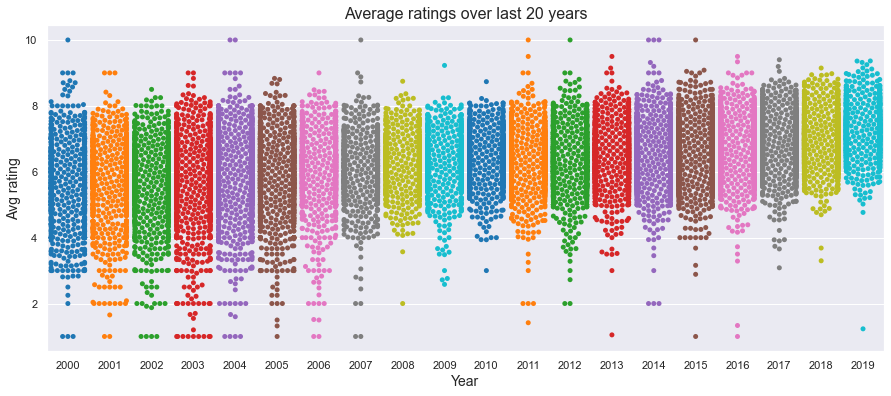

In [554]:
board_game_data_year = board_game_data[board_game_data['year'] > 1999]
board_game_data_year = board_game_data_year[board_game_data_year['year'] < 2020]
f, ax = plt.subplots(figsize = (15,6))
sns.swarmplot(x="year", y="avgratings", data=board_game_data_year , palette="tab10" )
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Avg rating",fontsize=14)
plt.title('Average ratings over last 20 years', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Player range')

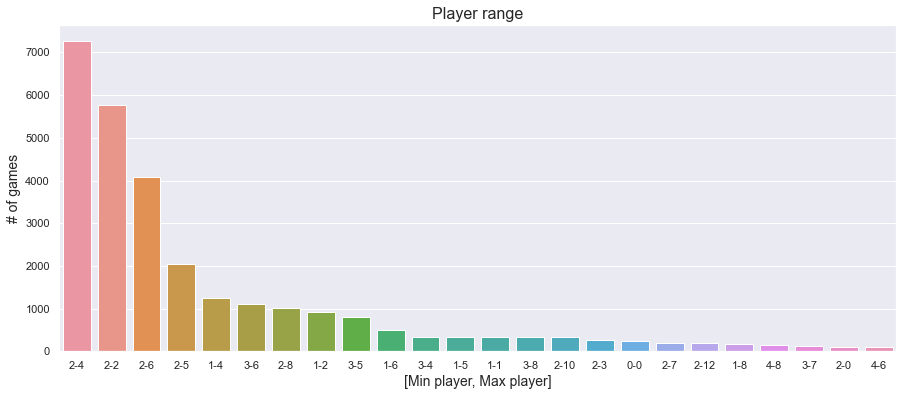

In [538]:
board_game_data['player_range'] = board_game_data['minplayer'].astype(str) + '-' + board_game_data['maxplayer'].astype(str)
player_range =  board_game_data['player_range'].value_counts()
player_range = player_range[player_range > 100]
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(x = player_range.index, y= player_range)
ax.set_xlabel("[Min player, Max player]",fontsize=14)
ax.set_ylabel("# of games",fontsize=14)
plt.title('Player range', fontsize=16)

Text(0, 0.5, '# of games')

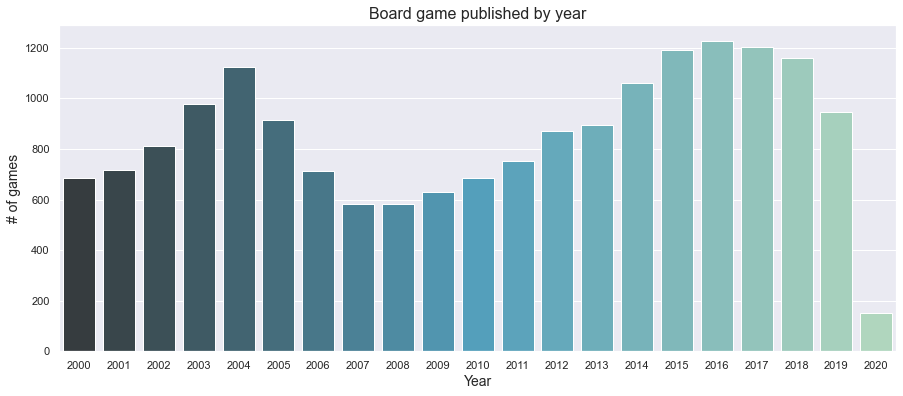

In [536]:
board_game_data_year = board_game_data[board_game_data['year'] > 1999]
game_count = board_game_data_year['year'].value_counts()
game_count = game_count[game_count > 25]
f, ax = plt.subplots(figsize = (15, 6))
sns.set_palette("coolwarm", 7)
sns.barplot(x = game_count.index, y = game_count, palette=("GnBu_d"))
plt.title('Board game published by year', fontsize=16)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("# of games",fontsize=14)


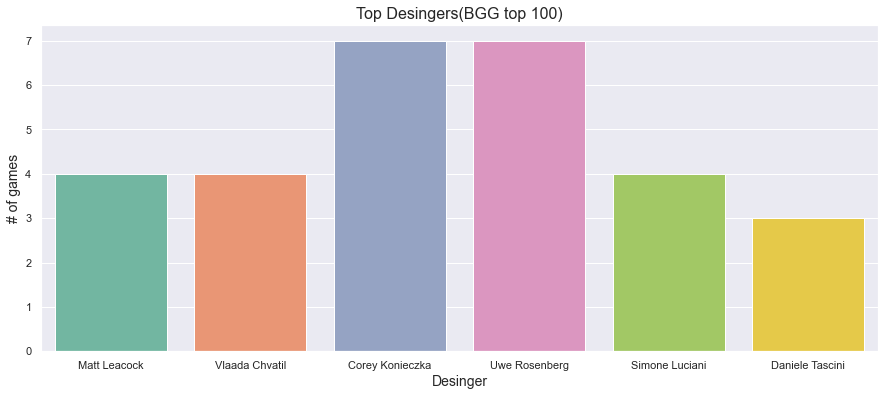

{'Matt Leacock': 4,
 'Vlaada Chvatil': 4,
 'Corey Konieczka': 7,
 'Uwe Rosenberg': 7,
 'Simone Luciani': 4,
 'Daniele Tascini': 3}

In [534]:
board_game_data_desinger = board_game_data[board_game_data['designer'] != '(Uncredited)']
board_game_data_desinger = board_game_data_desinger[board_game_data_desinger['rank'] != 0]
board_game_data_desinger = board_game_data_desinger.sort_values('rank')
top_designers= board_game_data_desinger[:100]['designer'].tolist()
top_designers = [designer.split(', ') for designer in top_designers]
top_designers = chain(*top_designers)
# top_designers = [name.replace(' ', '\n') for name in top_designers ]
top_designers_count = Counter(top_designers)
top_designers_count = {name:top_designers_count[name] for name in top_designers_count if top_designers_count[name] > 2}
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x=[str(i) for i in top_designers_count.keys()], y=[i for i in top_designers_count.values()], palette=("Set2"))
ax.set_xlabel("Desinger",fontsize=14)
ax.set_ylabel("# of games",fontsize=14)
plt.title('Top Desingers(BGG top 100)', fontsize=16)
plt.xticks(rotation=0)
plt.show()
top_designers_count

[Text(0.5, 0, 'player count')]

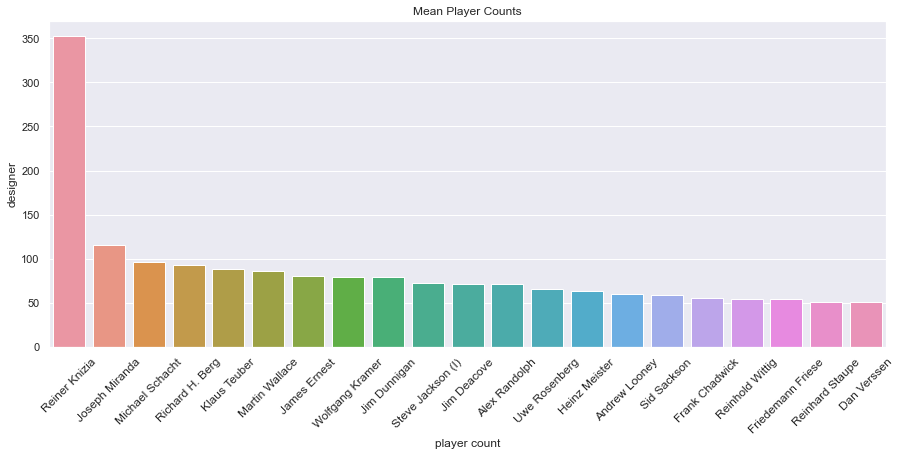

In [273]:
board_game_data_desinger = board_game_data[board_game_data['designer'] != '(Uncredited)']
board_game_data_desinger = board_game_data_desinger[board_game_data['designer'] != 'not define']
board_game_data_desinger = board_game_data_desinger[board_game_data['designer'] != ' ']

designer_count = board_game_data_desinger['designer'].value_counts()
designer_count = designer_count[designer_count > 50]
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = designer_count.index, y = designer_count)
plt.title('Mean Player Counts', size=12)
plt.xticks(rotation=45, size = 12)
ax.set(xlabel='player count')

In [391]:
unique_designers= board_game_data_desinger['designer'].tolist()
unique_designers = [designer.split(', ') for designer in unique_designers]
unique_designers = chain(*unique_designers)
unique_designers_count = Counter(unique_designers)

In [392]:
len(unique_designers_count)

11717

In [397]:
unique_categories= board_game_data_desinger['category'].tolist()
unique_categories = [category.split(', ') for category in unique_categories]
unique_categories = set(chain(*unique_categories))
unique_categories_count = Counter(unique_categories)

In [398]:
len(unique_categories)

85

In [289]:
unique_mechanics= board_game_data_desinger['mechanic'].tolist()
unique_mechanics = [mechanic.split(', ') for mechanic in unique_mechanics]
unique_mechanics = chain(*unique_mechanics)
unique_mechanics_count = Counter(unique_mechanics)

In [290]:
len(unique_mechanics_count)

183

In [291]:
unique_publisher= board_game_data_desinger['publisher'].tolist()
unique_publisher = [pulbisher.split(', ') for pulbisher in unique_publisher]
unique_publisher = chain(*unique_publisher)
unique_publisher_count = Counter(unique_publisher)

In [292]:
len(unique_publisher_count)

6094

In [527]:
board_game_data_copy = board_game_data[board_game_data['year'] > 1999]
board_game_data_copy = board_game_data_copy[board_game_data_copy['year'] < 2020]

In [528]:
board_game_data_copy_category = board_game_data_copy.groupby(['year','category']).count()[['name']]

In [529]:
['Card Game','Abstract Strategy',"Children's Game",'Economic','Adventure','Animals','Wargame','Dice','Bluffing','Action / Dexterity']

['Card Game',
 'Abstract Strategy',
 "Children's Game",
 'Economic',
 'Adventure',
 'Animals',
 'Wargame',
 'Dice',
 'Bluffing',
 'Action / Dexterity']

Text(0, 0.5, 'Count')

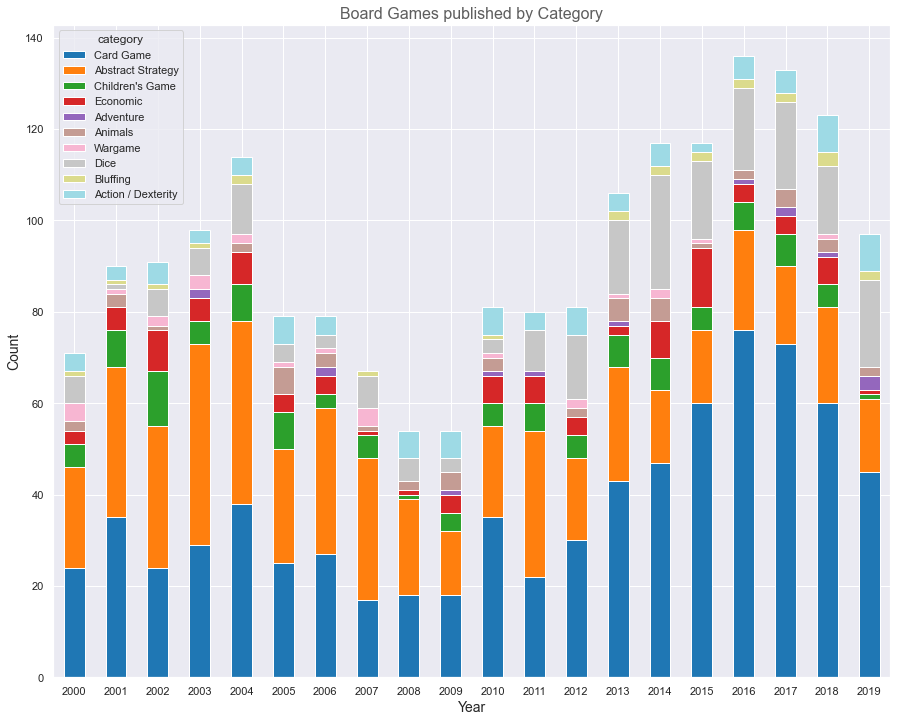

In [531]:
pivot_df = board_game_data_copy_category.reset_index().pivot(index='year', columns='category', values='name')
pivot_df.fillna(0)
fig, ax = plt.subplots(figsize = (15, 6))
pivot_df.loc[:,['Card Game','Abstract Strategy',"Children's Game",'Economic','Adventure','Animals','Wargame','Dice','Bluffing','Action / Dexterity']].plot.bar(rot = 0,stacked=True,colormap='tab20', figsize=(15,12), ax=ax, alpha = 1.0)
ax.set_title('Board Games published by Category',fontsize=16, color= 'k', alpha = 0.7)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

In [522]:
pivot_df.columns

Index(['Abstract Strategy', 'Action / Dexterity', 'Adventure', 'Age of Reason',
       'American Civil War', 'American West', 'Ancient', 'Animals',
       'Aviation / Flight', 'Bluffing', 'Card Game', 'City Building',
       'Civil War', 'Civilization', 'Collectible Components', 'Deduction',
       'Dice', 'Economic', 'Electronic', 'Environmental', 'Exploration',
       'Fantasy', 'Farming', 'Fighting', 'Horror', 'Humor',
       'Industry / Manufacturing', 'Medical', 'Medieval', 'Miniatures',
       'Modern Warfare', 'Napoleonic', 'Nautical', 'Negotiation', 'Party Game',
       'Political', 'Post-Napoleonic', 'Racing', 'Real-time', 'Renaissance',
       'Science Fiction', 'Trains', 'Wargame'],
      dtype='object', name='category')

In [ ]:
['Card Game','Abstract Strategy','Economic','Adventure','Animals','Wargame','Dice','Bluffing','Action / Dexterity']